In [414]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
#city_data_df
#ride_data_df

In [415]:
# Combine the data into a single dataset
merged_city_ride = pd.merge(ride_data_df, city_data_df,
                                 on='city', how = 'left' )
# Display the data table for preview
merged_city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [416]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

In [417]:
#Build bubble plot to showcase relationship between 4 variables
#Variables: 1. Average Fare ($) Per City, 
           #2. Total Number of Rides Per City, 
           #3. Total Number of Drivers Per City, 
           #4. City Type (Urban, Suburban, Rural)

#Group by city
city_df = merged_city_ride.groupby('city')

#1. Average Fare ($) Per City
avg_fare = city_df.mean()['fare']
#avg_fare
#2. Total Number of Rides Per City
tot_rides = city_df.count()['ride_id']
#tot_rides
#3. Avg Number of Drivers Per City
tot_driver = city_df.mean()['driver_count']
#tot_driver

#Set Index to City
city_type = city_data_df.set_index('city')['type']
#city_type

#DataFrame
pyber_df = pd.DataFrame({"Average Fare": avg_fare,
                         "Total Rides": tot_rides,
                         "Total Drivers": tot_driver,
                         "City Type": city_type})
pyber_df.head()

,Average Fare,Total Rides,Total Drivers,City Type
Amandaburgh,24.641667,18,12.0,Urban
Barajasview,25.332273,22,26.0,Urban
Barronchester,36.422500,16,11.0,Suburban
Bethanyland,32.956111,18,22.0,Suburban
Bradshawfurt,40.064000,10,7.0,Rural


In [418]:
#4. City Type (Urban, Suburban, Rural)
r_city= pyber_df.loc[pyber_df['City Type']=='Rural']
u_city= pyber_df.loc[pyber_df['City Type']=='Urban']
s_city = pyber_df.loc[pyber_df['City Type']=='Suburban']

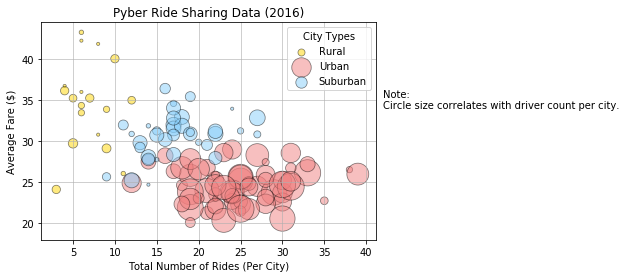

In [419]:
#Scatter Plot Building Blocks
#Pyber color scheme (Gold, Light Sky Blue, and Light Coral)
plt.scatter(r_city["Total Rides"],r_city["Average Fare"], s = r_city["Total Drivers"]*10, facecolor="gold", edgecolors="black", lw = 0.75, alpha = 0.50, label="Rural")
plt.scatter(u_city["Total Rides"],u_city["Average Fare"], s = u_city["Total Drivers"]*10, facecolor="lightcoral",edgecolors="black", lw = 0.75, alpha = 0.50, label="Urban")
plt.scatter(s_city["Total Rides"],s_city["Average Fare"], s = s_city["Total Drivers"]*10, facecolor="lightskyblue",edgecolors="black", lw = 0.75, alpha = 0.50, label="Suburban")

#Chart Aesthetics 
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend (title= 'City Types',loc= "best")
plt.grid (lw = 0.6)
plt.text(42,34,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

#Save figure
plt.savefig("../Images/PyberRideSharingData.png", bbox_inches="tight")

# Show plot
plt.show()

## Total Fares by City Type

In [420]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure

In [421]:
#% of Total Fares by City Type
tot_fare_pie = merged_city_ride.groupby(['type'])['fare'].sum()
#tot_fare_pie
tot_fare_pie.index #to use as chart labels 

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

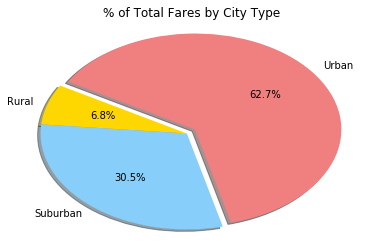

In [422]:
#Build Pie Chart 1
# The colors of each section of the pie chart in the order of the index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.07)
plt.pie(tot_fare_pie, explode=explode, labels=tot_fare_pie.index, 
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

plt.axis('auto')

#Save Fig
plt.savefig("../Images/PyberTotalFaresbyCity_Pie.png", bbox_inches="tight")

# Show Figure
plt.show()

## Total Rides by City Type

In [423]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure

In [424]:
#% of Total Rides by City Type
tot_ride_pie = merged_city_ride.groupby(['type'])['ride_id'].count()
tot_ride_pie.index #to use as chart labels 

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

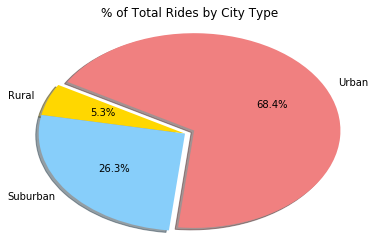

In [425]:
#Build Pie Chart 2
#Same color and explode as Chart 1
plt.pie(tot_ride_pie, explode=explode, labels=tot_ride_pie.index, 
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

plt.axis('auto')

#Save Fig
plt.savefig("../Images/PyberTotalRidesbyCity_Pie.png", bbox_inches="tight")

# Show Figure
plt.show()

## Total Drivers by City Type

In [426]:
# Calculate Driver Percents
# Build Pie Charts
# Save Figure

In [427]:
#% of Total Rides by City Type
tot_driver_pie = merged_city_ride.groupby(['type'])['driver_count'].sum()
tot_driver_pie.index #to use as chart labels 


Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

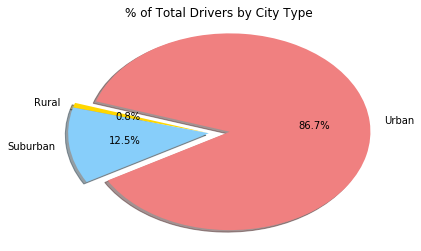

In [429]:
#Build Pie Chart 3
#Same colors as Chart 1
explode = (0, 0, 0.15)
plt.pie(tot_driver_pie, explode=explode, labels=tot_driver_pie.index, 
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=162)
plt.title("% of Total Drivers by City Type")

plt.axis('auto')

#Save Fig
plt.savefig("../Images/PyberTotalDriversbyCity_Pie.png", bbox_inches="tight")

# Show Figure
plt.show()